## What is in this kernel?
This kenel is dedicated for doing Exploratory data analysis on Google Q&A competition data.We will be exploring various aspects of the data given which hopefully will be helpful for our fellow kagglers.

<font color="Blue" size=4 >please UPVOTE the kernel if you find it helpful </font> 

**This kernel is divided into 2 parts**

# part 1 : EDA

# part 2 : Transfer Learning(modeling)

# part 1 : EDA

## Importing Required Libaries

In [1]:
# CODE TAKEN FROM https://github.com/kpe/bert-for-tf2/
# ALL CREDITS TO https://github.com/kpe
# CODE COPIED TO LOCAL FOLDER DUE TO INTERNET RESTRICTIONS
# NORMALLY THIS CODE WOULD BE AVAILABLE VIA pip install bert-for-tf2

# coding=utf-8
# Copyright 2018 The Google AI Language Team Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
"""Tokenization classes."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gc
import os
import warnings
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk import ngrams
from collections import Counter
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim
from keras.preprocessing.text import Tokenizer

pyLDAvis.enable_notebook()
np.random.seed(2018)
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### Getting Basic idea about the data

In [2]:
sample = pd.read_csv('/kaggle/input/google-quest-challenge/sample_submission.csv')
sample.head(3)

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,...,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308
1,46,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,...,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448
2,70,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,...,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673


In [3]:
train = pd.read_csv('/kaggle/input/google-quest-challenge/train.csv')
train.head(3)

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889


In [4]:
test = pd.read_csv('/kaggle/input/google-quest-challenge/test.csv')
test.head(3)

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com


In [5]:
target_columns = sample.columns.values[1:].tolist()
target_columns

['question_asker_intent_understanding',
 'question_body_critical',
 'question_conversational',
 'question_expect_short_answer',
 'question_fact_seeking',
 'question_has_commonly_accepted_answer',
 'question_interestingness_others',
 'question_interestingness_self',
 'question_multi_intent',
 'question_not_really_a_question',
 'question_opinion_seeking',
 'question_type_choice',
 'question_type_compare',
 'question_type_consequence',
 'question_type_definition',
 'question_type_entity',
 'question_type_instructions',
 'question_type_procedure',
 'question_type_reason_explanation',
 'question_type_spelling',
 'question_well_written',
 'answer_helpful',
 'answer_level_of_information',
 'answer_plausible',
 'answer_relevance',
 'answer_satisfaction',
 'answer_type_instructions',
 'answer_type_procedure',
 'answer_type_reason_explanation',
 'answer_well_written']

In [6]:
print("Train and test shape: {} {}".format(train.shape, test.shape))

Train and test shape: (6079, 41) (476, 11)


### Target Features

In [7]:
targets = [
        'question_asker_intent_understanding',
        'question_body_critical',
        'question_conversational',
        'question_expect_short_answer',
        'question_fact_seeking',
        'question_has_commonly_accepted_answer',
        'question_interestingness_others',
        'question_interestingness_self',
        'question_multi_intent',
        'question_not_really_a_question',
        'question_opinion_seeking',
        'question_type_choice',
        'question_type_compare',
        'question_type_consequence',
        'question_type_definition',
        'question_type_entity',
        'question_type_instructions',
        'question_type_procedure',
        'question_type_reason_explanation',
        'question_type_spelling',
        'question_well_written',
        'answer_helpful',
        'answer_level_of_information',
        'answer_plausible',
        'answer_relevance',
        'answer_satisfaction',
        'answer_type_instructions',
        'answer_type_procedure',
        'answer_type_reason_explanation',
        'answer_well_written'    
    ]


### Distribution of character length in question_title

In [8]:
train['question_title'].str.len()

0        68
1       108
2        56
3        37
4        44
       ... 
6074     36
6075     54
6076     50
6077     40
6078     76
Name: question_title, Length: 6079, dtype: int64

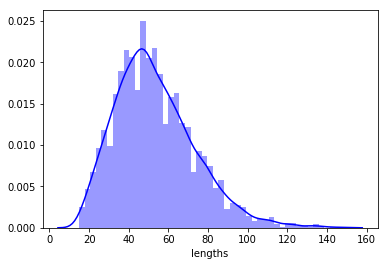

In [9]:
#Number of characters in the sentence

lengths = train['question_title'].apply(len)
train['lengths'] = lengths
lengths = train.loc[train['lengths']<4000]['lengths']
sns.distplot(lengths, color='b')
plt.show()

- Although the lengths seem to be skewed just a bit to the lower lengths.we see another clear peak around the 45-50 character mark.

### Distribution of characters in question body & Answer body

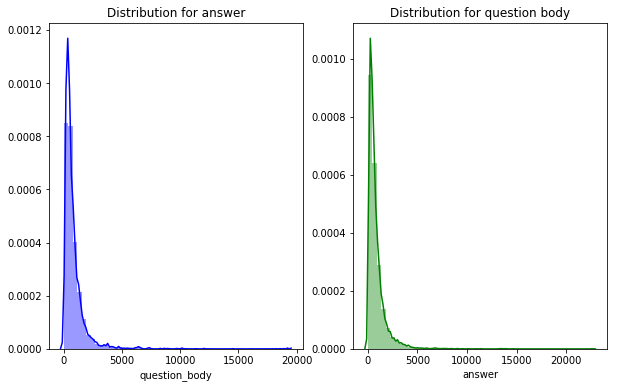

In [10]:
question_body=train['question_body'].str.len()
answer_body=train['answer'].str.len()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
sns.distplot(question_body,ax=ax1,color='blue')
sns.distplot(answer_body,ax=ax2,color='green')
ax2.set_title('Distribution for question body')
ax1.set_title('Distribution for answer')
plt.show()


- hmm,both the distributions are left skewed and almost identical.


### Distribution of the number of words in the question_body

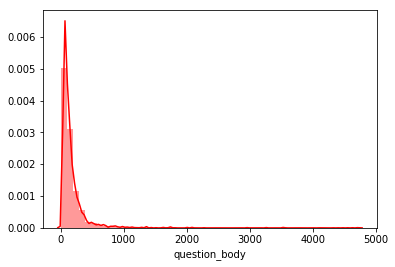

In [11]:
words = train['question_body'].apply(lambda x: len(x) - len(''.join(x.split())) + 1)
train['words'] = words
#words = train.loc[train['words']<500]['words']
sns.distplot(words, color='r')
plt.show()



It looks like we have a unimodal left-skewed distribution of the number of words in the question_body.


### Distribution of the number of words in the Answer

Text(0.5, 1.0, 'Distribution of no: of words in answer')

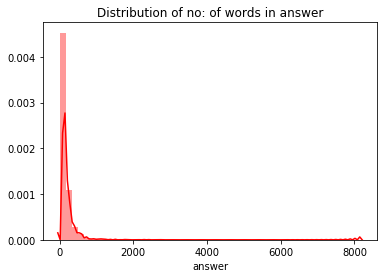

In [12]:
answer=train['answer'].apply(lambda x : len(x.split(' ')))
sns.distplot(answer,color='red')
plt.gca().set_title('Distribution of no: of words in answer')

### Average Word Length

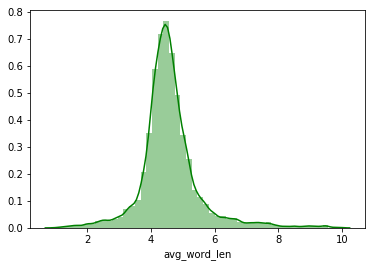

In [13]:
avg_word_len = train['answer'].apply(lambda x: 1.0*len(''.join(x.split()))/(len(x) - len(''.join(x.split())) + 1))
train['avg_word_len'] = avg_word_len
avg_word_len = train.loc[train['avg_word_len']<10]['avg_word_len']
sns.distplot(avg_word_len, color='g')
plt.show()


We have a simple bell-shaped normal distribution of the average word length with a mean of around 4.5


In [14]:
stopwords=stopwords.words('english')
train['que_stopwords']=train['question_body'].apply(lambda x : [x for x in x.split() if x in stopwords])
train['ans_stopwords']=train['answer'].apply(lambda x: [x for x in x.split() if x in stopwords])

### Distribution of stopwords in question & Answer

Text(0.5, 1.0, 'Distribution of stopwords in  Answer')

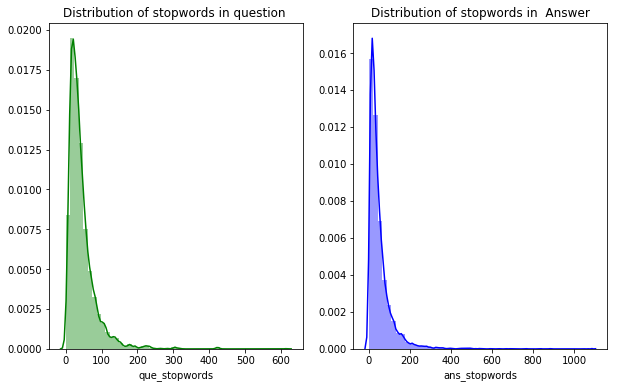

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
words=train['que_stopwords'].apply(lambda x : len(x))
sns.distplot(words,color='green',ax=ax1)
ax1.set_title('Distribution of stopwords in question ')
words=train['ans_stopwords'].apply(lambda x: len(x))
sns.distplot(words,color='blue',ax=ax2)
ax2.set_title('Distribution of stopwords in  Answer')


## Ngram analysis

In [16]:

def common_ngrams(col,common=10):
    corpus=[]
    for question in train[col].values:
        words=[str(x[0]+' '+x[1]) for x in ngrams(question.split(),2)]
        corpus.append(words)
    flatten=[x for one in corpus for x in one]
    counter=Counter(flatten)
    most_common=counter.most_common(common)
    string,value=zip(*(most_common))
    return string,value


### Common bigrams in question title

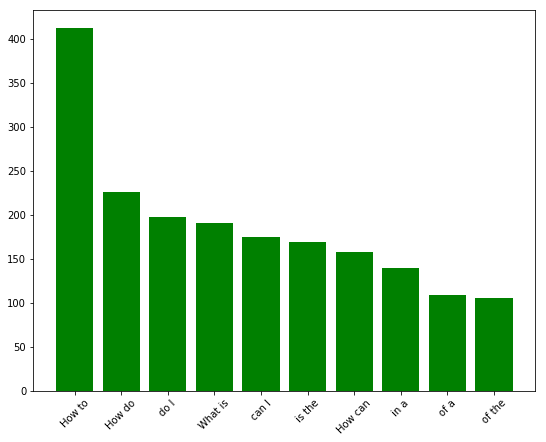

In [17]:
string,value=common_ngrams('question_title')
plt.figure(figsize=(9,7))
plt.bar(height=value,x=string,color='green')
plt.gca().set_xticklabels(string,rotation='45')
plt.show()

Well, as expected majority of questions start or have 'how to' or 'what is' with them.

### common bigrams in Answer title

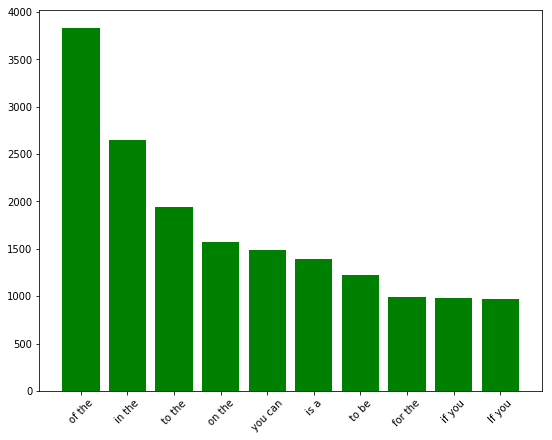

In [18]:
string,value=common_ngrams('answer')
plt.figure(figsize=(9,7))
plt.bar(height=value,x=string,color='green')
plt.gca().set_xticklabels(string,rotation='45')
plt.show()

Reference : [JIGSAW EDA](https://www.kaggle.com/gpreda/jigsaw-eda) 

[Jigsaw Competition : EDA and Modeling](https://www.kaggle.com/tarunpaparaju/jigsaw-competition-eda-and-modeling)

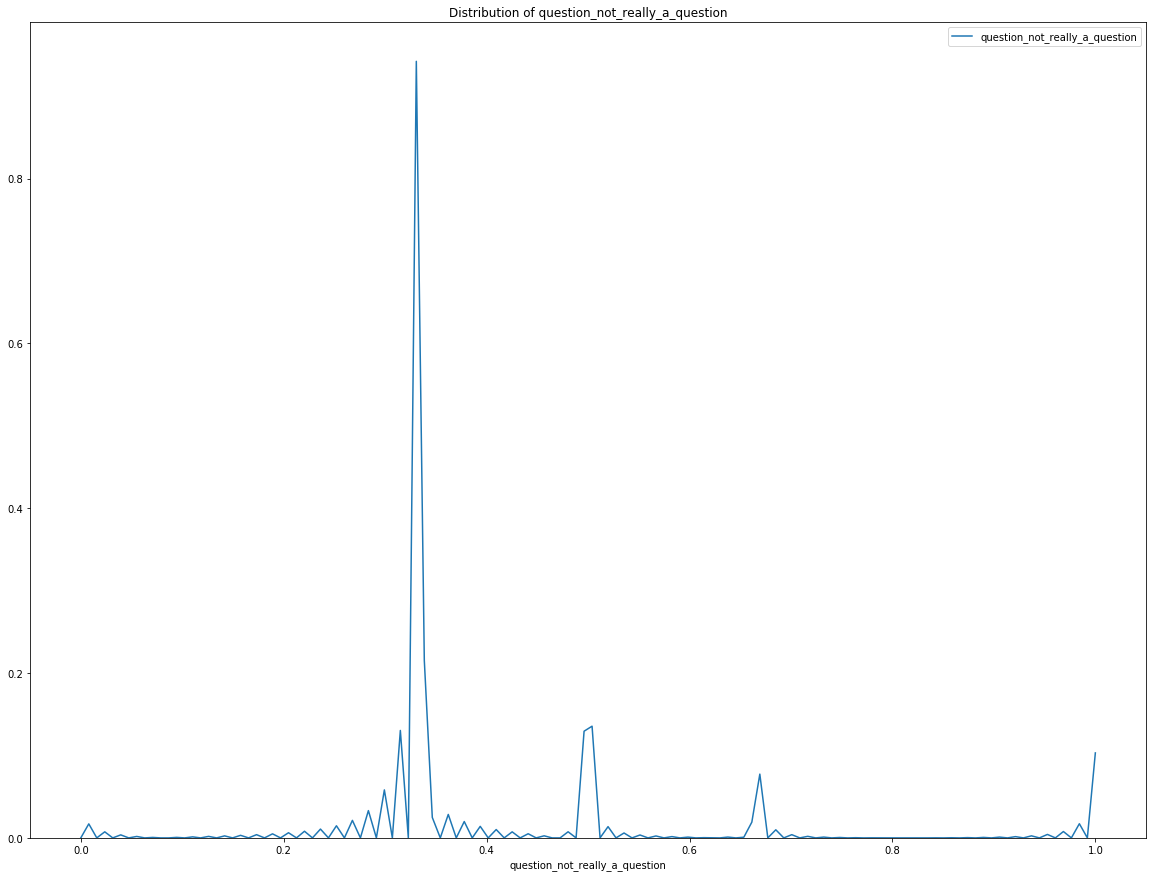

In [19]:
plt.figure(figsize=(20,15))
plt.title("Distribution of question_not_really_a_question")
sns.distplot(train['question_not_really_a_question'],kde=True,hist=False, bins=120, label='question_not_really_a_question')
plt.legend(); plt.show()

*In cell above you can replace question_not_really_a_question with other keywords from targets variable to get exact distribution of that column*

### Lets Plot Feature Distribution 

In [20]:
def plot_features_distribution(features, title):
    plt.figure(figsize=(15,10))
    plt.title(title)
    for feature in features:
        sns.distplot(train.loc[~train[feature].isnull(),feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

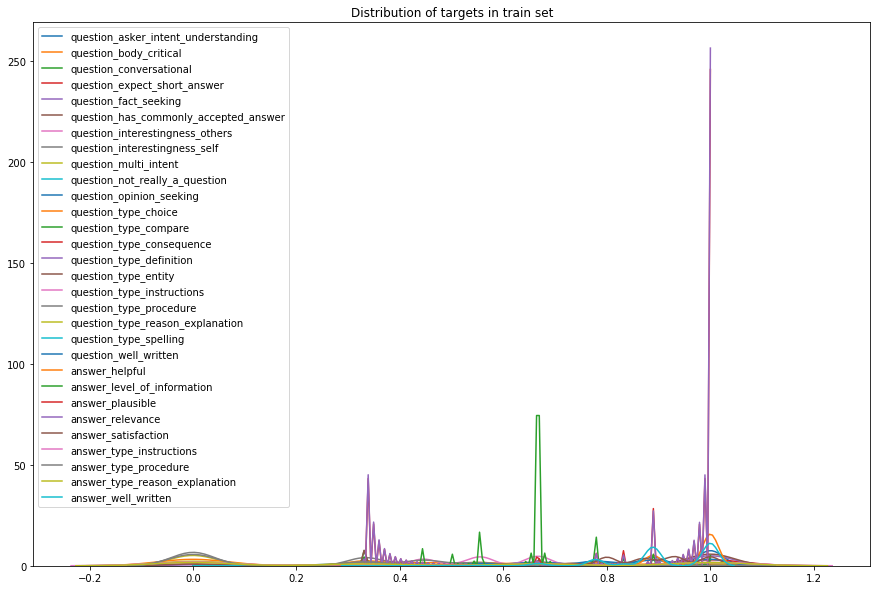

In [21]:
plot_features_distribution(targets, "Distribution of targets in train set")

### question_well_written  vs  answer_well_written 

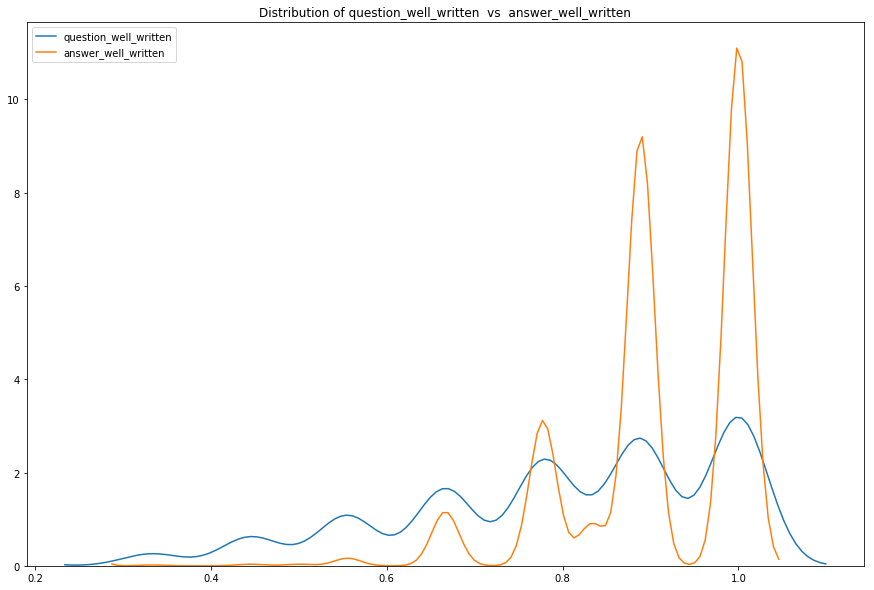

In [22]:
features = ['question_well_written','answer_well_written']
plot_features_distribution(features, "Distribution of question_well_written  vs  answer_well_written")

## Lets see More data distribution

In [23]:
def plot_count(feature, title,size=1):
    f, ax = plt.subplots(1,1, figsize=(10,10))
    total = float(len(train))
    g = sns.countplot(train[feature], order = train[feature].round(2).value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2,
                height + 5,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()   

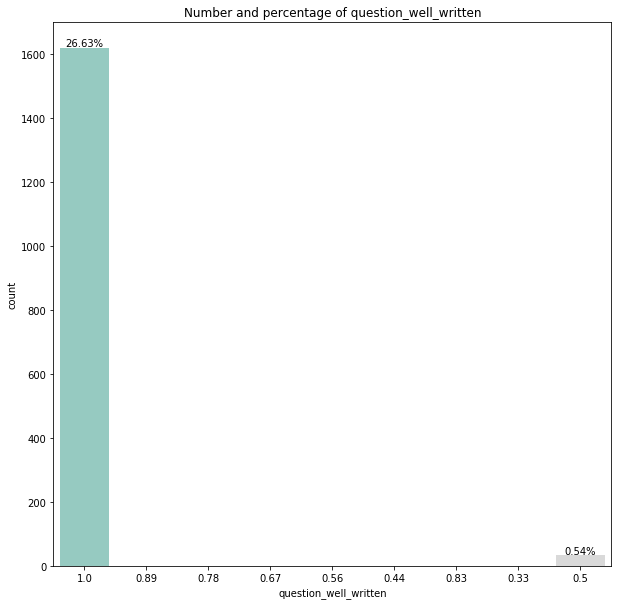

In [24]:
plot_count('question_well_written','question_well_written')

**The graphs below are self explanatory,so i won't wspend much time explaining what the graphs below mean**

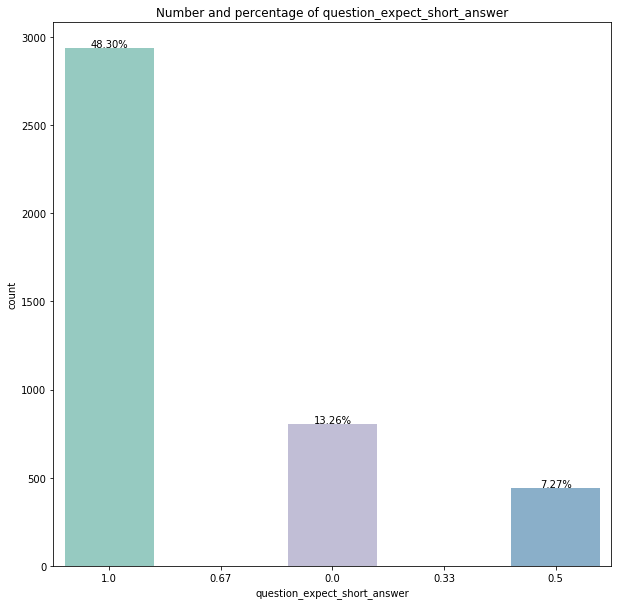

In [25]:
plot_count('question_expect_short_answer','question_expect_short_answer')

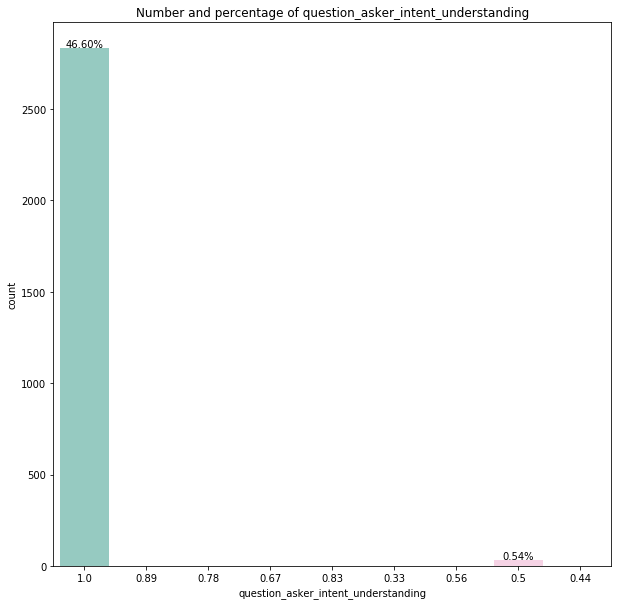

In [26]:
plot_count('question_asker_intent_understanding','question_asker_intent_understanding')

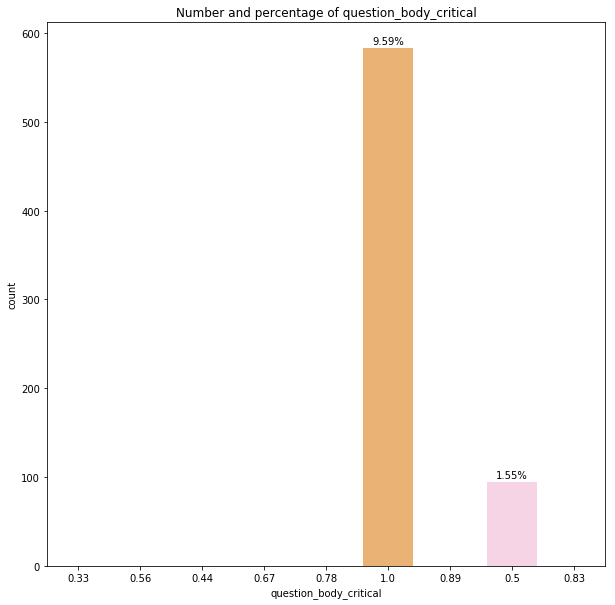

In [27]:
plot_count('question_body_critical','question_body_critical')

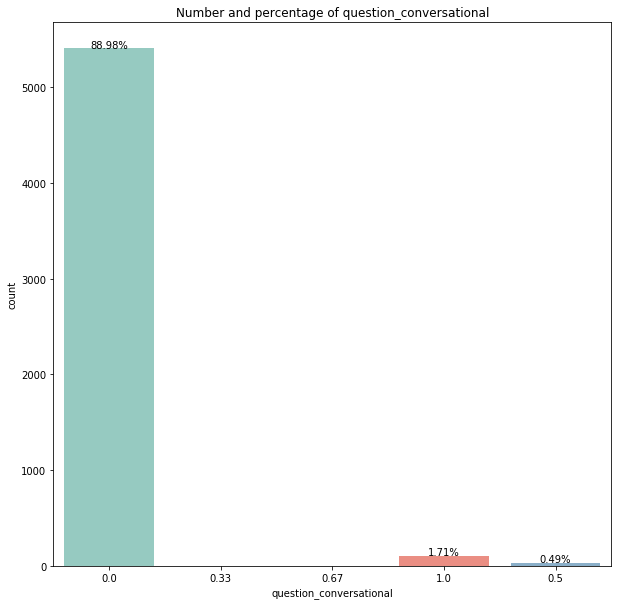

In [28]:
plot_count('question_conversational','question_conversational')

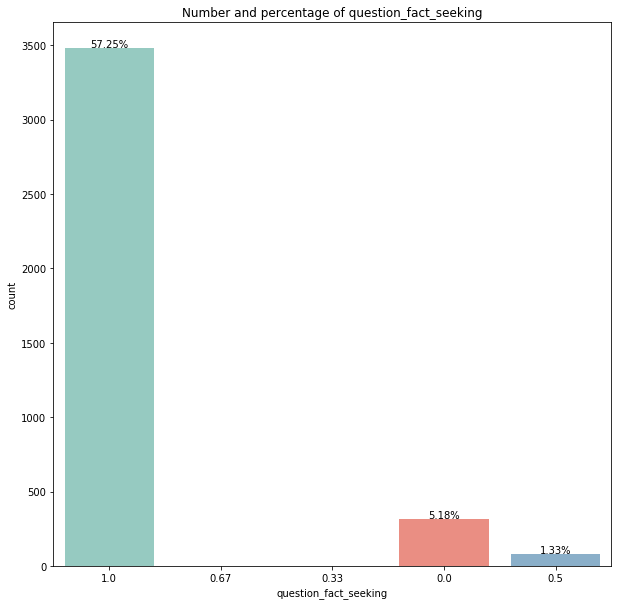

In [29]:
plot_count('question_fact_seeking','question_fact_seeking')

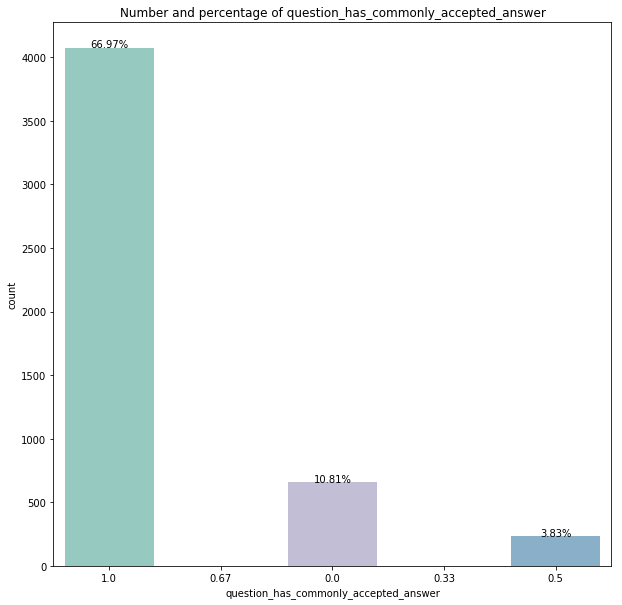

In [30]:
plot_count('question_has_commonly_accepted_answer','question_has_commonly_accepted_answer')

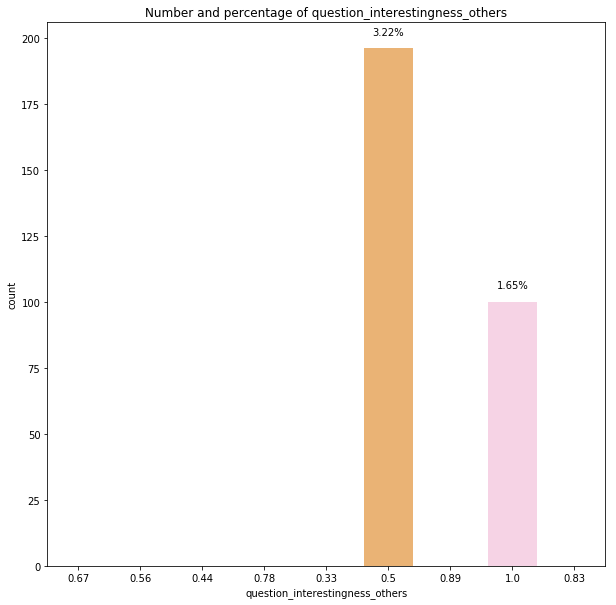

In [31]:
plot_count('question_interestingness_others','question_interestingness_others')

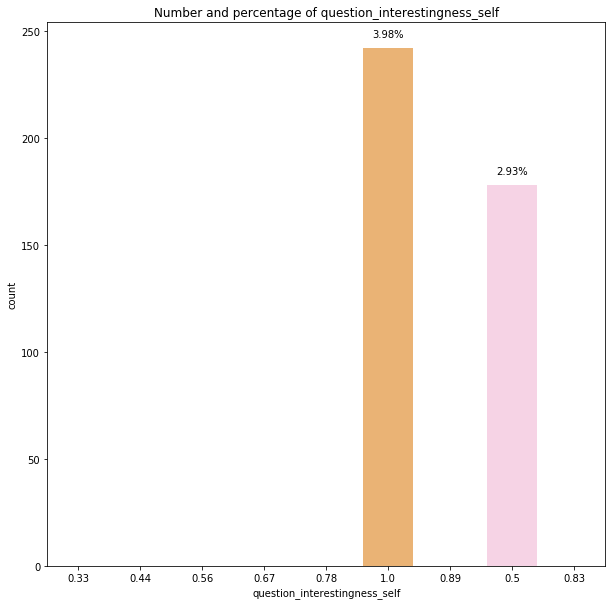

In [32]:
plot_count('question_interestingness_self','question_interestingness_self')

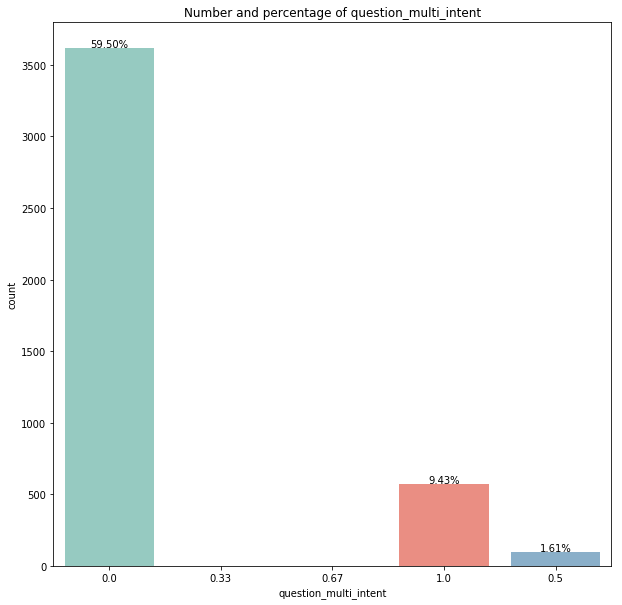

In [33]:
plot_count('question_multi_intent','question_multi_intent')

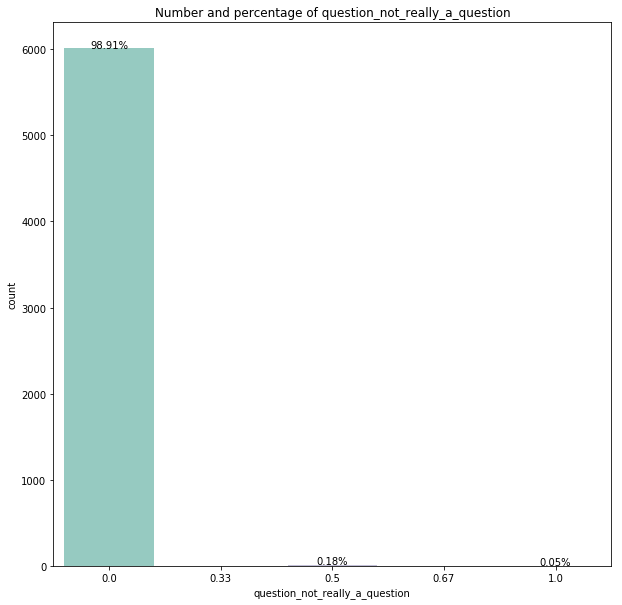

In [34]:
plot_count('question_not_really_a_question','question_not_really_a_question')

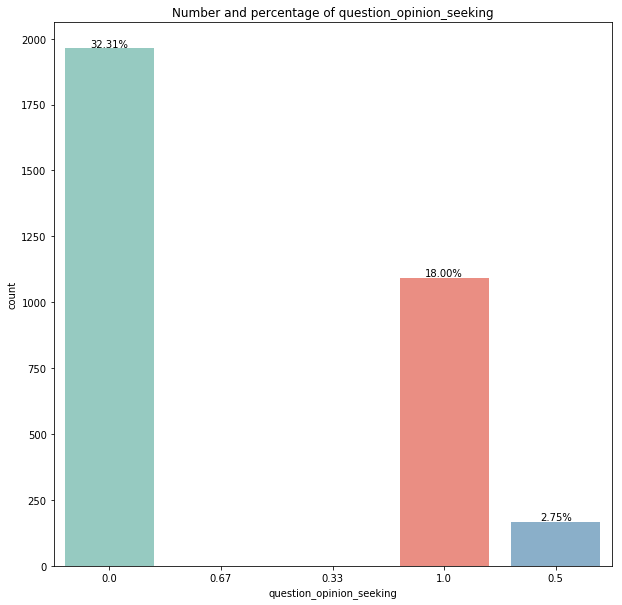

In [35]:
plot_count('question_opinion_seeking','question_opinion_seeking')

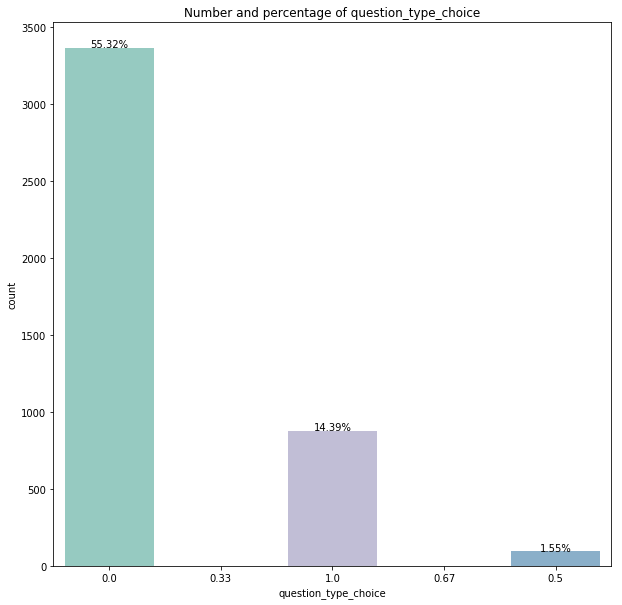

In [36]:
plot_count('question_type_choice','question_type_choice')

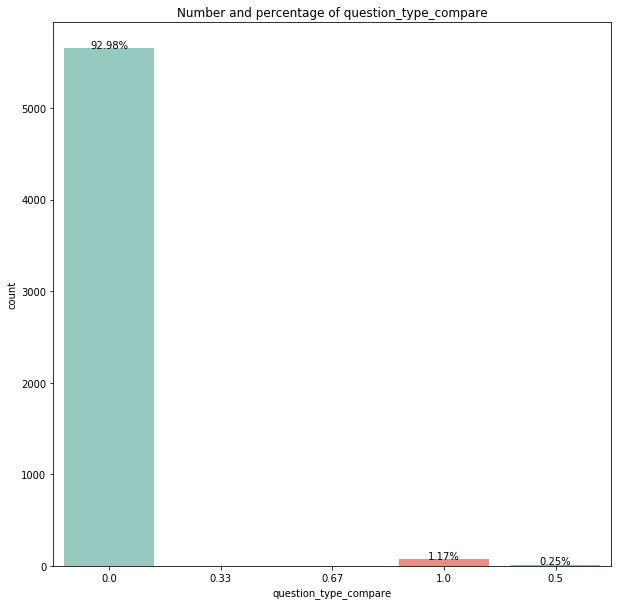

In [37]:
plot_count('question_type_compare','question_type_compare')

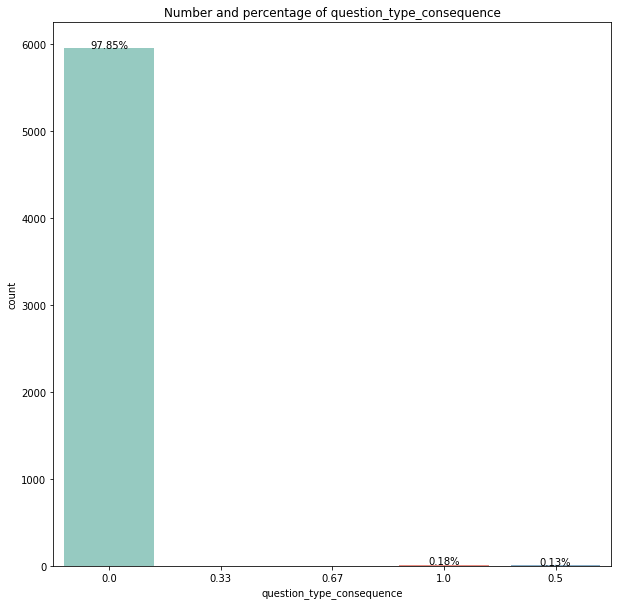

In [38]:
plot_count('question_type_consequence','question_type_consequence')

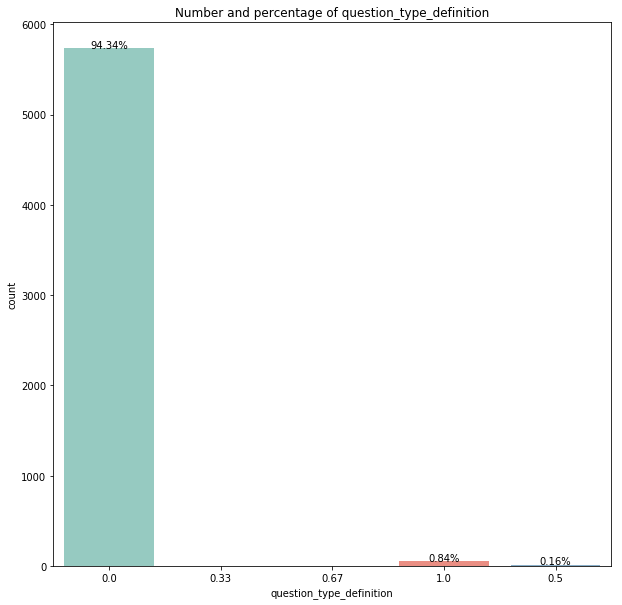

In [39]:
plot_count('question_type_definition','question_type_definition')

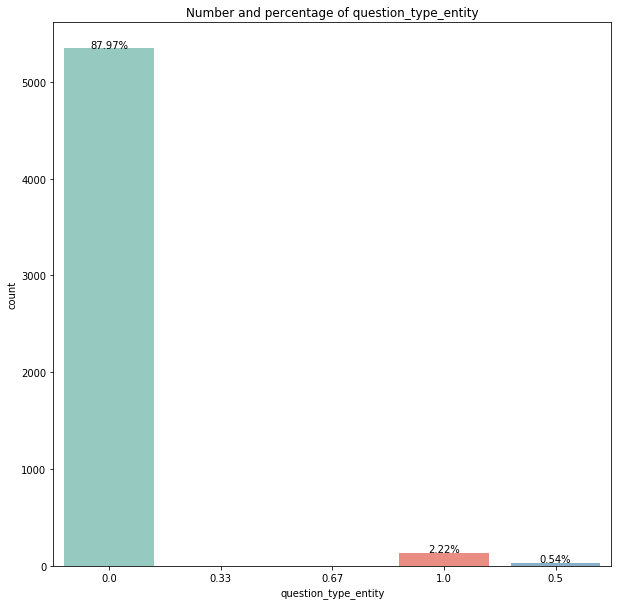

In [40]:
plot_count('question_type_entity','question_type_entity')

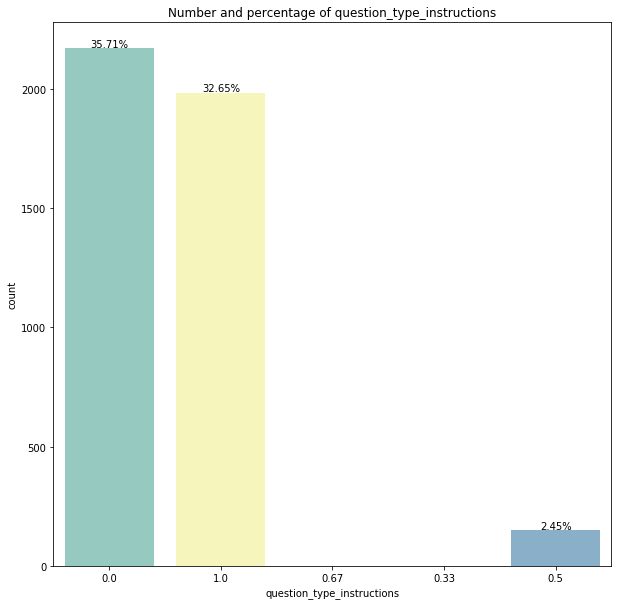

In [41]:
plot_count('question_type_instructions','question_type_instructions')

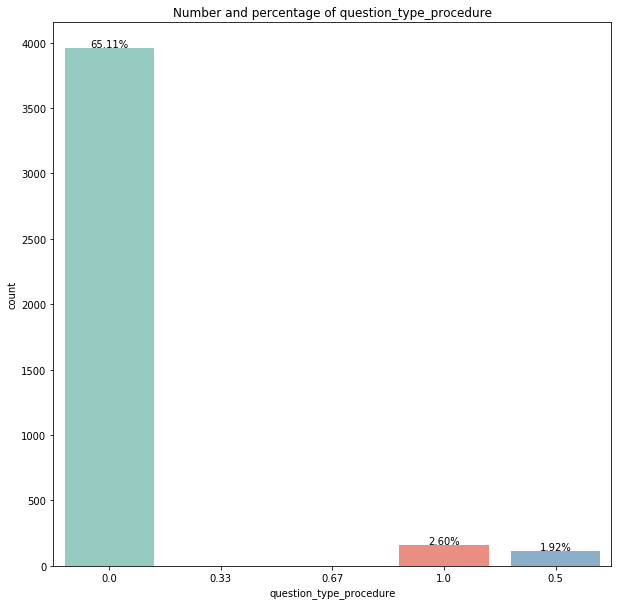

In [42]:
plot_count('question_type_procedure','question_type_procedure')

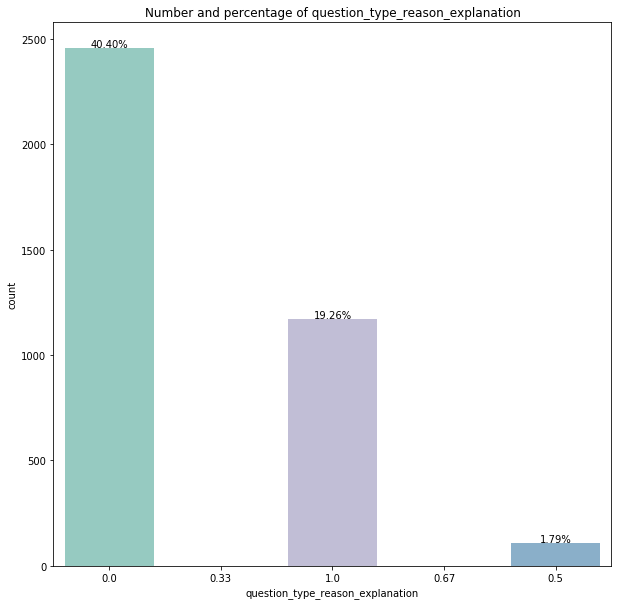

In [43]:
plot_count('question_type_reason_explanation','question_type_reason_explanation')

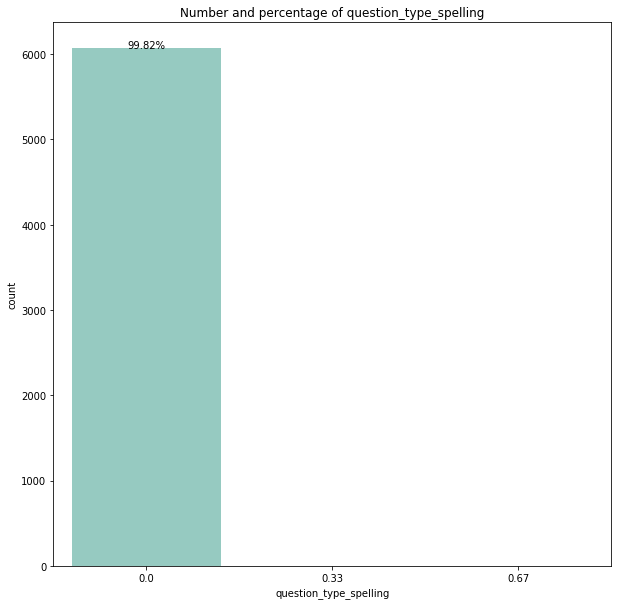

In [44]:
plot_count('question_type_spelling','question_type_spelling')

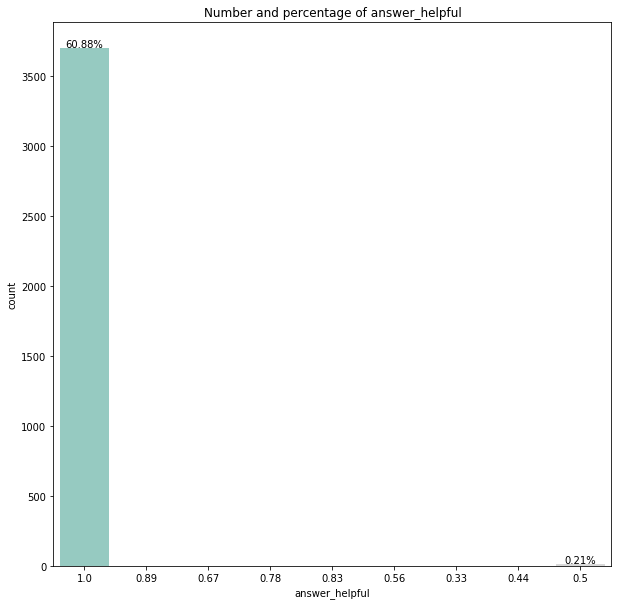

In [45]:
plot_count('answer_helpful','answer_helpful')

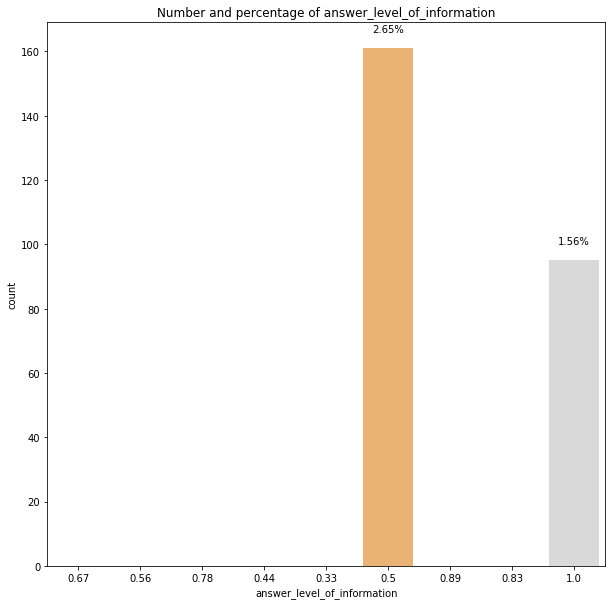

In [46]:
plot_count('answer_level_of_information','answer_level_of_information')

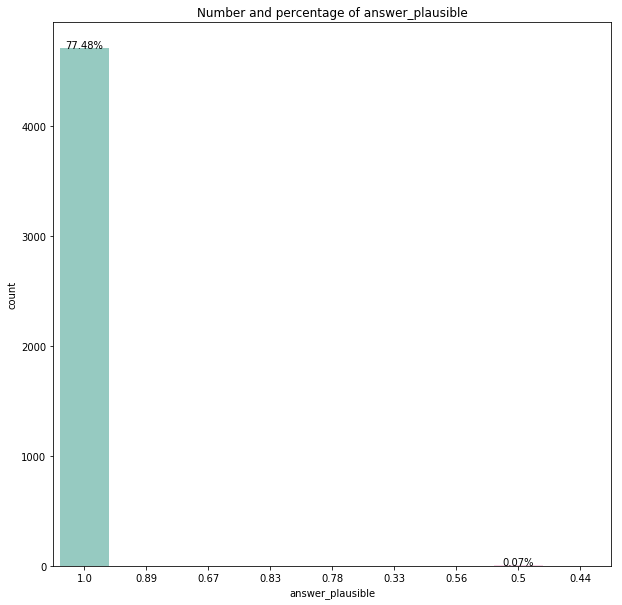

In [47]:
plot_count('answer_plausible','answer_plausible')

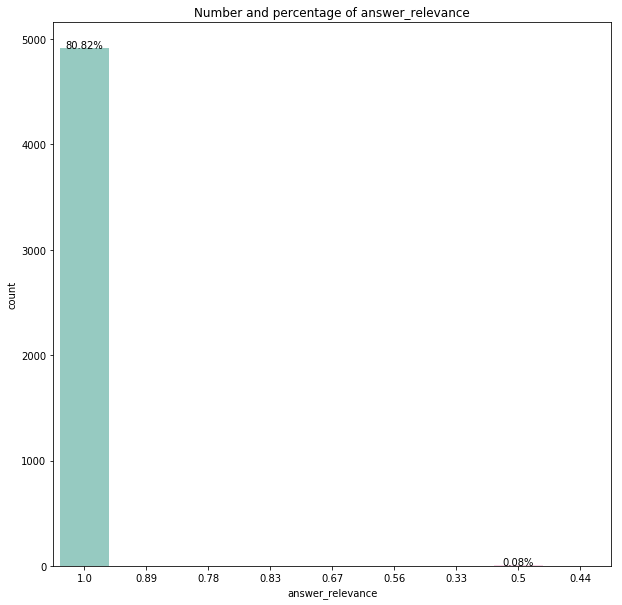

In [48]:
plot_count('answer_relevance','answer_relevance')

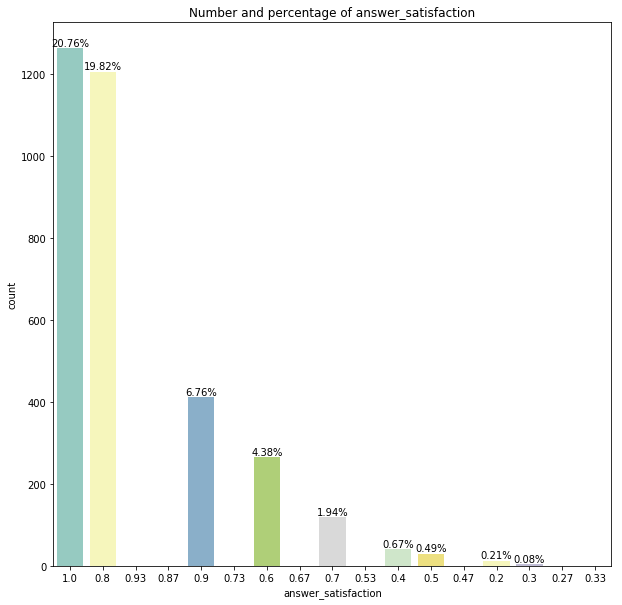

In [49]:
plot_count('answer_satisfaction','answer_satisfaction')

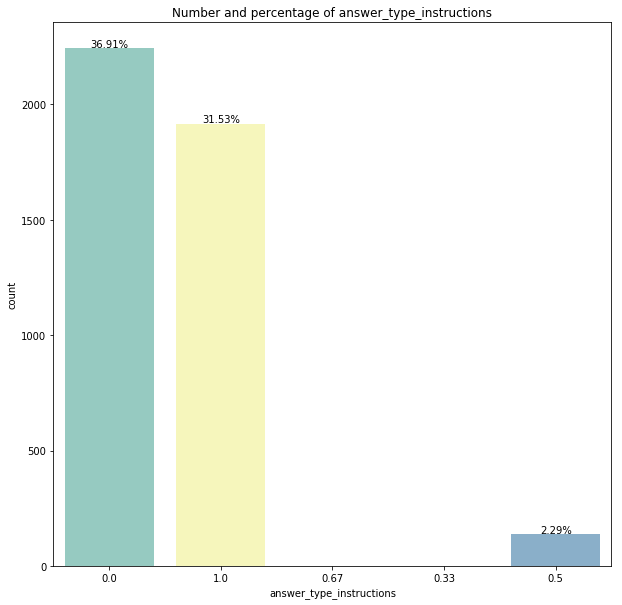

In [50]:
plot_count('answer_type_instructions','answer_type_instructions')

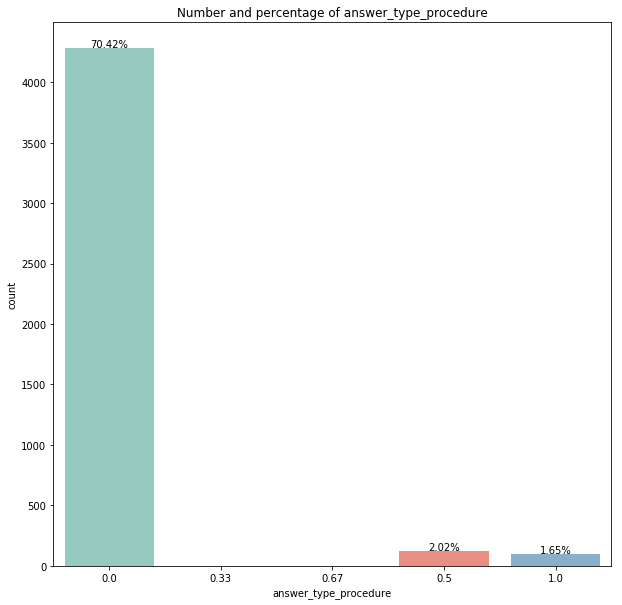

In [51]:
plot_count('answer_type_procedure','answer_type_procedure')

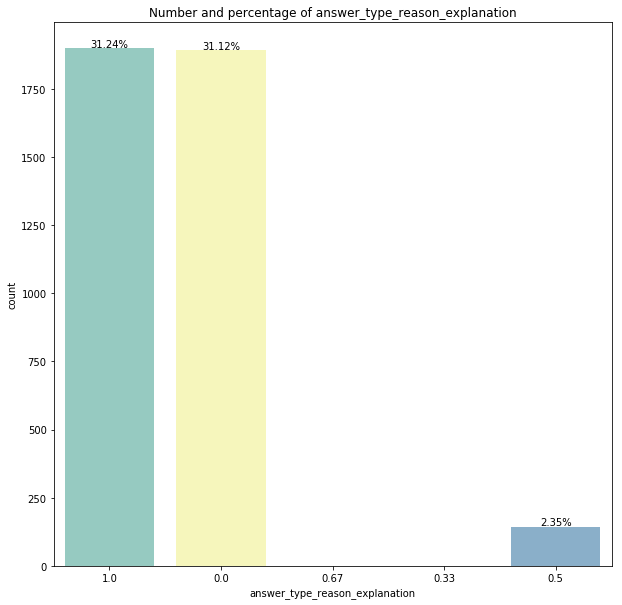

In [52]:
plot_count('answer_type_reason_explanation','answer_type_reason_explanation')

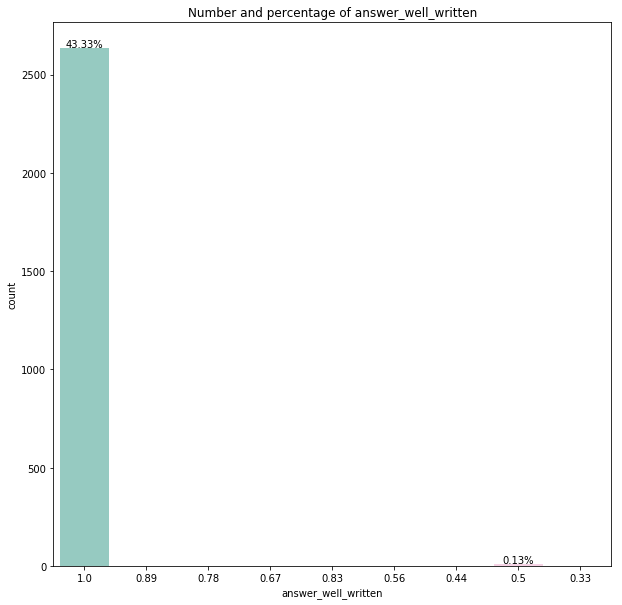

In [53]:
plot_count('answer_well_written','answer_well_written')

### wordcloud of frequent used words in the question_body.

In [54]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

### prevalent words in the train set 
(we will use a 6079 question_body sample and show top 100 words)

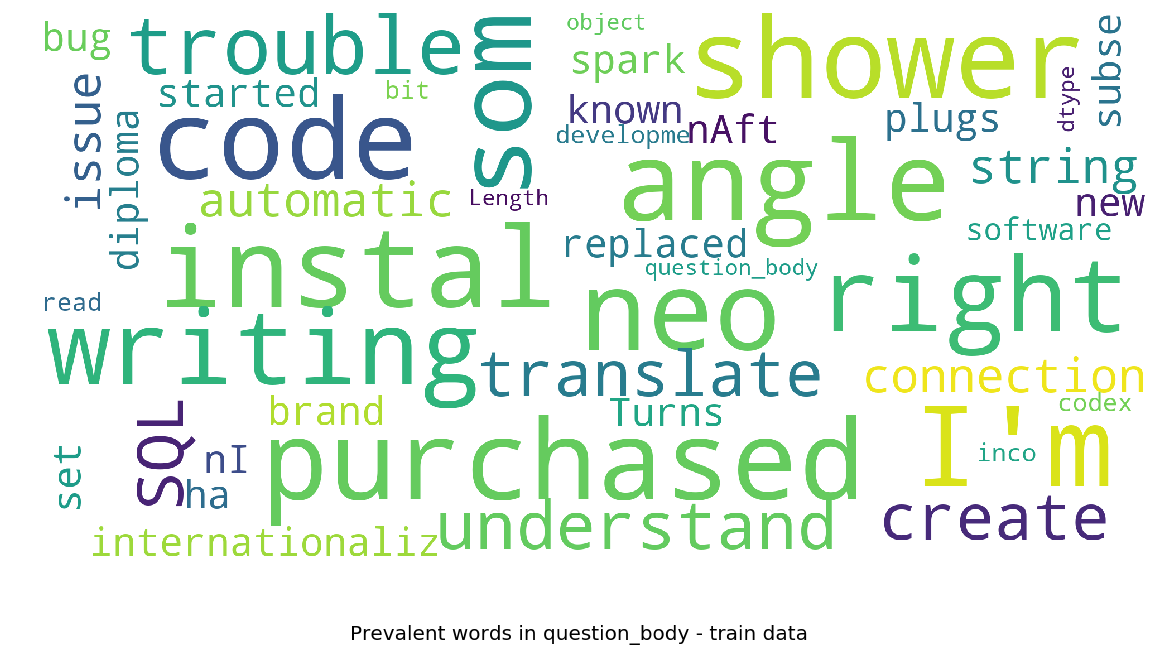

In [55]:
show_wordcloud(train['question_body'].sample(6079), title = 'Prevalent words in question_body - train data')

### frequent used words in question_body for which question_well_written score above 0.6

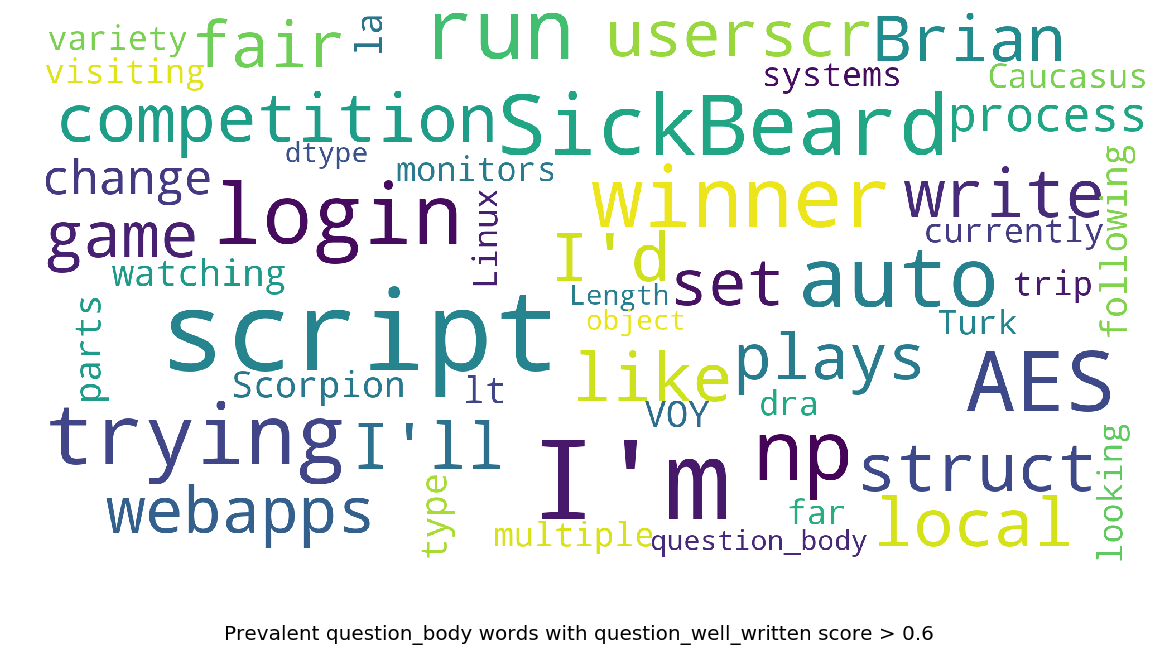

In [56]:
show_wordcloud(train.loc[train['question_well_written'] > 0.6]['question_body'].sample(3000), 
               title = 'Prevalent question_body words with question_well_written score > 0.6')

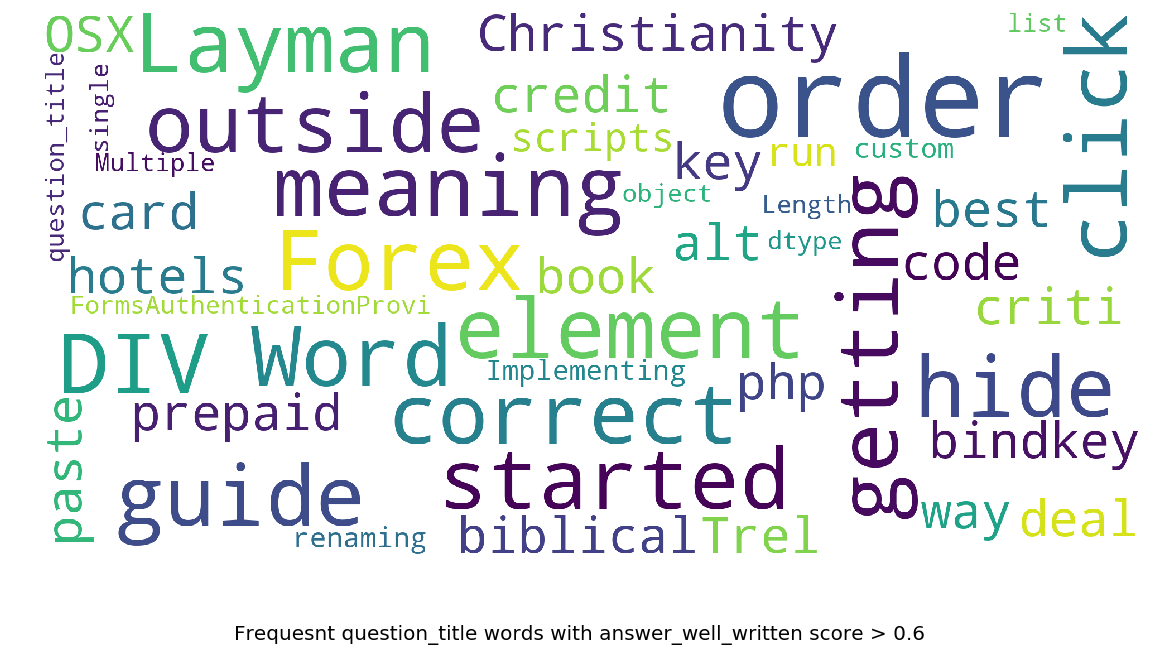

In [57]:
show_wordcloud(train.loc[train['answer_well_written'] > 0.6]['question_title'].sample(3000), 
               title = 'Frequesnt question_title words with answer_well_written score > 0.6')

# part 2 : Transfer Learning(modeling)

*Using this [kernel](https://www.kaggle.com/bibek777/bert-base-tf2-0-minimalistic-iii/notebook) i will add my trained models weight *

In [58]:


import collections
import re
import unicodedata
import six
import tensorflow as tf


def validate_case_matches_checkpoint(do_lower_case, init_checkpoint):
    """Checks whether the casing config is consistent with the checkpoint name."""

    # The casing has to be passed in by the user and there is no explicit check
    # as to whether it matches the checkpoint. The casing information probably
    # should have been stored in the bert_config.json file, but it's not, so
    # we have to heuristically detect it to validate.

    if not init_checkpoint:
        return

    m = re.match("^.*?([A-Za-z0-9_-]+)/bert_model.ckpt", init_checkpoint)
    if m is None:
        return

    model_name = m.group(1)

    lower_models = [
        "uncased_L-24_H-1024_A-16", "uncased_L-12_H-768_A-12",
        "multilingual_L-12_H-768_A-12", "chinese_L-12_H-768_A-12"
    ]

    cased_models = [
        "cased_L-12_H-768_A-12", "cased_L-24_H-1024_A-16",
        "multi_cased_L-12_H-768_A-12"
    ]

    is_bad_config = False
    if model_name in lower_models and not do_lower_case:
        is_bad_config = True
        actual_flag = "False"
        case_name = "lowercased"
        opposite_flag = "True"

    if model_name in cased_models and do_lower_case:
        is_bad_config = True
        actual_flag = "True"
        case_name = "cased"
        opposite_flag = "False"

    if is_bad_config:
        raise ValueError(
            "You passed in `--do_lower_case=%s` with `--init_checkpoint=%s`. "
            "However, `%s` seems to be a %s model, so you "
            "should pass in `--do_lower_case=%s` so that the fine-tuning matches "
            "how the model was pre-training. If this error is wrong, please "
            "just comment out this check." % (actual_flag, init_checkpoint,
                                              model_name, case_name, opposite_flag))


def convert_to_unicode(text):
    """Converts `text` to Unicode (if it's not already), assuming utf-8 input."""
    if six.PY3:
        if isinstance(text, str):
            return text
        elif isinstance(text, bytes):
            return text.decode("utf-8", "ignore")
        else:
            raise ValueError("Unsupported string type: %s" % (type(text)))
    elif six.PY2:
        if isinstance(text, str):
            return text.decode("utf-8", "ignore")
        elif isinstance(text, unicode):
            return text
        else:
            raise ValueError("Unsupported string type: %s" % (type(text)))
    else:
        raise ValueError("Not running on Python2 or Python 3?")


def printable_text(text):
    """Returns text encoded in a way suitable for print or `tf.logging`."""

    # These functions want `str` for both Python2 and Python3, but in one case
    # it's a Unicode string and in the other it's a byte string.
    if six.PY3:
        if isinstance(text, str):
            return text
        elif isinstance(text, bytes):
            return text.decode("utf-8", "ignore")
        else:
            raise ValueError("Unsupported string type: %s" % (type(text)))
    elif six.PY2:
        if isinstance(text, str):
            return text
        elif isinstance(text, unicode):
            return text.encode("utf-8")
        else:
            raise ValueError("Unsupported string type: %s" % (type(text)))
    else:
        raise ValueError("Not running on Python2 or Python 3?")


def load_vocab(vocab_file):
    """Loads a vocabulary file into a dictionary."""
    vocab = collections.OrderedDict()
    index = 0
    with tf.io.gfile.GFile(vocab_file, "r") as reader:
        while True:
            token = convert_to_unicode(reader.readline())
            if not token:
                break
            token = token.strip()
            vocab[token] = index
            index += 1
    return vocab


def convert_by_vocab(vocab, items):
    """Converts a sequence of [tokens|ids] using the vocab."""
    output = []
    for item in items:
        output.append(vocab[item])
    return output


def convert_tokens_to_ids(vocab, tokens):
    return convert_by_vocab(vocab, tokens)


def convert_ids_to_tokens(inv_vocab, ids):
    return convert_by_vocab(inv_vocab, ids)


def whitespace_tokenize(text):
    """Runs basic whitespace cleaning and splitting on a piece of text."""
    text = text.strip()
    if not text:
        return []
    tokens = text.split()
    return tokens


class FullTokenizer(object):
    """Runs end-to-end tokenziation."""

    def __init__(self, vocab_file, do_lower_case=True):
        self.vocab = load_vocab(vocab_file)
        self.inv_vocab = {v: k for k, v in self.vocab.items()}
        self.basic_tokenizer = BasicTokenizer(do_lower_case=do_lower_case)
        self.wordpiece_tokenizer = WordpieceTokenizer(vocab=self.vocab)

    def tokenize(self, text):
        split_tokens = []
        for token in self.basic_tokenizer.tokenize(text):
            for sub_token in self.wordpiece_tokenizer.tokenize(token):
                split_tokens.append(sub_token)

        return split_tokens

    def convert_tokens_to_ids(self, tokens):
        return convert_by_vocab(self.vocab, tokens)

    def convert_ids_to_tokens(self, ids):
        return convert_by_vocab(self.inv_vocab, ids)


class BasicTokenizer(object):
    """Runs basic tokenization (punctuation splitting, lower casing, etc.)."""

    def __init__(self, do_lower_case=True):
        """Constructs a BasicTokenizer.
        Args:
          do_lower_case: Whether to lower case the input.
        """
        self.do_lower_case = do_lower_case

    def tokenize(self, text):
        """Tokenizes a piece of text."""
        text = convert_to_unicode(text)
        text = self._clean_text(text)

        # This was added on November 1st, 2018 for the multilingual and Chinese
        # models. This is also applied to the English models now, but it doesn't
        # matter since the English models were not trained on any Chinese data
        # and generally don't have any Chinese data in them (there are Chinese
        # characters in the vocabulary because Wikipedia does have some Chinese
        # words in the English Wikipedia.).
        text = self._tokenize_chinese_chars(text)

        orig_tokens = whitespace_tokenize(text)
        split_tokens = []
        for token in orig_tokens:
            if self.do_lower_case:
                token = token.lower()
                token = self._run_strip_accents(token)
            split_tokens.extend(self._run_split_on_punc(token))

        output_tokens = whitespace_tokenize(" ".join(split_tokens))
        return output_tokens

    def _run_strip_accents(self, text):
        """Strips accents from a piece of text."""
        text = unicodedata.normalize("NFD", text)
        output = []
        for char in text:
            cat = unicodedata.category(char)
            if cat == "Mn":
                continue
            output.append(char)
        return "".join(output)

    def _run_split_on_punc(self, text):
        """Splits punctuation on a piece of text."""
        chars = list(text)
        i = 0
        start_new_word = True
        output = []
        while i < len(chars):
            char = chars[i]
            if _is_punctuation(char):
                output.append([char])
                start_new_word = True
            else:
                if start_new_word:
                    output.append([])
                start_new_word = False
                output[-1].append(char)
            i += 1

        return ["".join(x) for x in output]

    def _tokenize_chinese_chars(self, text):
        """Adds whitespace around any CJK character."""
        output = []
        for char in text:
            cp = ord(char)
            if self._is_chinese_char(cp):
                output.append(" ")
                output.append(char)
                output.append(" ")
            else:
                output.append(char)
        return "".join(output)

    def _is_chinese_char(self, cp):
        """Checks whether CP is the codepoint of a CJK character."""
        # This defines a "chinese character" as anything in the CJK Unicode block:
        #   https://en.wikipedia.org/wiki/CJK_Unified_Ideographs_(Unicode_block)
        #
        # Note that the CJK Unicode block is NOT all Japanese and Korean characters,
        # despite its name. The modern Korean Hangul alphabet is a different block,
        # as is Japanese Hiragana and Katakana. Those alphabets are used to write
        # space-separated words, so they are not treated specially and handled
        # like the all of the other languages.
        if ((cp >= 0x4E00 and cp <= 0x9FFF) or  #
                (cp >= 0x3400 and cp <= 0x4DBF) or  #
                (cp >= 0x20000 and cp <= 0x2A6DF) or  #
                (cp >= 0x2A700 and cp <= 0x2B73F) or  #
                (cp >= 0x2B740 and cp <= 0x2B81F) or  #
                (cp >= 0x2B820 and cp <= 0x2CEAF) or
                (cp >= 0xF900 and cp <= 0xFAFF) or  #
                (cp >= 0x2F800 and cp <= 0x2FA1F)):  #
            return True

        return False

    def _clean_text(self, text):
        """Performs invalid character removal and whitespace cleanup on text."""
        output = []
        for char in text:
            cp = ord(char)
            if cp == 0 or cp == 0xfffd or _is_control(char):
                continue
            if _is_whitespace(char):
                output.append(" ")
            else:
                output.append(char)
        return "".join(output)


class WordpieceTokenizer(object):
    """Runs WordPiece tokenziation."""

    def __init__(self, vocab, unk_token="[UNK]", max_input_chars_per_word=200):
        self.vocab = vocab
        self.unk_token = unk_token
        self.max_input_chars_per_word = max_input_chars_per_word

    def tokenize(self, text):
        """Tokenizes a piece of text into its word pieces.
        This uses a greedy longest-match-first algorithm to perform tokenization
        using the given vocabulary.
        For example:
          input = "unaffable"
          output = ["un", "##aff", "##able"]
        Args:
          text: A single token or whitespace separated tokens. This should have
            already been passed through `BasicTokenizer.
        Returns:
          A list of wordpiece tokens.
        """

        text = convert_to_unicode(text)

        output_tokens = []
        for token in whitespace_tokenize(text):
            chars = list(token)
            if len(chars) > self.max_input_chars_per_word:
                output_tokens.append(self.unk_token)
                continue

            is_bad = False
            start = 0
            sub_tokens = []
            while start < len(chars):
                end = len(chars)
                cur_substr = None
                while start < end:
                    substr = "".join(chars[start:end])
                    if start > 0:
                        substr = "##" + substr
                    if substr in self.vocab:
                        cur_substr = substr
                        break
                    end -= 1
                if cur_substr is None:
                    is_bad = True
                    break
                sub_tokens.append(cur_substr)
                start = end

            if is_bad:
                output_tokens.append(self.unk_token)
            else:
                output_tokens.extend(sub_tokens)
        return output_tokens


def _is_whitespace(char):
    """Checks whether `chars` is a whitespace character."""
    # \t, \n, and \r are technically contorl characters but we treat them
    # as whitespace since they are generally considered as such.
    if char == " " or char == "\t" or char == "\n" or char == "\r":
        return True
    cat = unicodedata.category(char)
    if cat == "Zs":
        return True
    return False


def _is_control(char):
    """Checks whether `chars` is a control character."""
    # These are technically control characters but we count them as whitespace
    # characters.
    if char == "\t" or char == "\n" or char == "\r":
        return False
    cat = unicodedata.category(char)
    if cat in ("Cc", "Cf"):
        return True
    return False


def _is_punctuation(char):
    """Checks whether `chars` is a punctuation character."""
    cp = ord(char)
    # We treat all non-letter/number ASCII as punctuation.
    # Characters such as "^", "$", and "`" are not in the Unicode
    # Punctuation class but we treat them as punctuation anyways, for
    # consistency.
    if ((cp >= 33 and cp <= 47) or (cp >= 58 and cp <= 64) or
            (cp >= 91 and cp <= 96) or (cp >= 123 and cp <= 126)):
        return True
    cat = unicodedata.category(char)
    if cat.startswith("P"):
        return True
    return False

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import tensorflow_hub as hub
import tensorflow as tf
#import bert_tokenization as tokenization
import tensorflow.keras.backend as K
import gc
import os
from scipy.stats import spearmanr
from math import floor, ceil
from tensorflow.keras.models import load_model

np.set_printoptions(suppress=True)

In [60]:
PATH = '../input/google-quest-challenge/'
BERT_PATH = '../input/bert-base-from-tfhub/bert_en_uncased_L-12_H-768_A-12'
tokenizer = FullTokenizer(BERT_PATH+'/assets/vocab.txt', True)
MAX_SEQUENCE_LENGTH = 512

df_train = pd.read_csv(PATH+'train.csv')
df_test = pd.read_csv(PATH+'test.csv')
df_sub = pd.read_csv(PATH+'sample_submission.csv')
print('train shape =', df_train.shape)
print('test shape =', df_test.shape)

output_categories = list(df_train.columns[11:])
input_categories = list(df_train.columns[[1,2,5]])
print('\noutput categories:\n\t', output_categories)
print('\ninput categories:\n\t', input_categories)

train shape = (6079, 41)
test shape = (476, 11)

output categories:
	 ['question_asker_intent_understanding', 'question_body_critical', 'question_conversational', 'question_expect_short_answer', 'question_fact_seeking', 'question_has_commonly_accepted_answer', 'question_interestingness_others', 'question_interestingness_self', 'question_multi_intent', 'question_not_really_a_question', 'question_opinion_seeking', 'question_type_choice', 'question_type_compare', 'question_type_consequence', 'question_type_definition', 'question_type_entity', 'question_type_instructions', 'question_type_procedure', 'question_type_reason_explanation', 'question_type_spelling', 'question_well_written', 'answer_helpful', 'answer_level_of_information', 'answer_plausible', 'answer_relevance', 'answer_satisfaction', 'answer_type_instructions', 'answer_type_procedure', 'answer_type_reason_explanation', 'answer_well_written']

input categories:
	 ['question_title', 'question_body', 'answer']


In [61]:
def _get_masks(tokens, max_seq_length):
    """Mask for padding"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))

def _get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    first_sep = True
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            if first_sep:
                first_sep = False 
            else:
                current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))

def _get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

def _trim_input(title, question, answer, max_sequence_length, 
                t_max_len=30, q_max_len=239, a_max_len=239):

    t = tokenizer.tokenize(title)
    q = tokenizer.tokenize(question)
    a = tokenizer.tokenize(answer)
    
    t_len = len(t)
    q_len = len(q)
    a_len = len(a)

    if (t_len+q_len+a_len+4) > max_sequence_length:
        
        if t_max_len > t_len:
            t_new_len = t_len
            a_max_len = a_max_len + floor((t_max_len - t_len)/2)
            q_max_len = q_max_len + ceil((t_max_len - t_len)/2)
        else:
            t_new_len = t_max_len
      
        if a_max_len > a_len:
            a_new_len = a_len 
            q_new_len = q_max_len + (a_max_len - a_len)
        elif q_max_len > q_len:
            a_new_len = a_max_len + (q_max_len - q_len)
            q_new_len = q_len
        else:
            a_new_len = a_max_len
            q_new_len = q_max_len
            
            
        if t_new_len+a_new_len+q_new_len+4 != max_sequence_length:
            raise ValueError("New sequence length should be %d, but is %d" 
                             % (max_sequence_length, (t_new_len+a_new_len+q_new_len+4)))
        
        t = t[:t_new_len]
        q = q[:q_new_len]
        a = a[:a_new_len]
    
    return t, q, a

def _convert_to_bert_inputs(title, question, answer, tokenizer, max_sequence_length):
    """Converts tokenized input to ids, masks and segments for BERT"""
    
    stoken = ["[CLS]"] + title + ["[SEP]"] + question + ["[SEP]"] + answer + ["[SEP]"]

    input_ids = _get_ids(stoken, tokenizer, max_sequence_length)
    input_masks = _get_masks(stoken, max_sequence_length)
    input_segments = _get_segments(stoken, max_sequence_length)

    return [input_ids, input_masks, input_segments]

def compute_input_arays(df, columns, tokenizer, max_sequence_length):
    input_ids, input_masks, input_segments = [], [], []
    for _, instance in tqdm(df[columns].iterrows()):
        t, q, a = instance.question_title, instance.question_body, instance.answer

        t, q, a = _trim_input(t, q, a, max_sequence_length)

        ids, masks, segments = _convert_to_bert_inputs(t, q, a, tokenizer, max_sequence_length)
        input_ids.append(ids)
        input_masks.append(masks)
        input_segments.append(segments)
        
    return [np.asarray(input_ids, dtype=np.int32), 
            np.asarray(input_masks, dtype=np.int32), 
            np.asarray(input_segments, dtype=np.int32)]


def compute_output_arrays(df, columns):
    return np.asarray(df[columns])

In [62]:
def compute_spearmanr(trues, preds):
    rhos = []
    for col_trues, col_pred in zip(trues.T, preds.T):
        rhos.append(
            spearmanr(col_trues, col_pred + np.random.normal(0, 1e-7, col_pred.shape[0])).correlation)
    return np.mean(rhos)


class CustomCallback(tf.keras.callbacks.Callback):
    
    def __init__(self, valid_data, test_data, batch_size=16, fold=None):

        self.valid_inputs = valid_data[0]
        self.valid_outputs = valid_data[1]
        self.test_inputs = test_data
        
        self.batch_size = batch_size
        self.fold = fold
        
    def on_train_begin(self, logs={}):
        self.valid_predictions = []
        self.test_predictions = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.valid_predictions.append(
            self.model.predict(self.valid_inputs, batch_size=self.batch_size))
        
        rho_val = compute_spearmanr(
            self.valid_outputs, np.average(self.valid_predictions, axis=0))
        
        print("\nvalidation rho: %.4f" % rho_val)
        
        if self.fold is not None:
            self.model.save_weights(f'bert-base-{fold}-{epoch}.h5py')
        
        self.test_predictions.append(
            self.model.predict(self.test_inputs, batch_size=self.batch_size)
        )

def bert_model():
    
    input_word_ids = tf.keras.layers.Input(
        (MAX_SEQUENCE_LENGTH,), dtype=tf.int32, name='input_word_ids')
    input_masks = tf.keras.layers.Input(
        (MAX_SEQUENCE_LENGTH,), dtype=tf.int32, name='input_masks')
    input_segments = tf.keras.layers.Input(
        (MAX_SEQUENCE_LENGTH,), dtype=tf.int32, name='input_segments')
    
    bert_layer = hub.KerasLayer(BERT_PATH, trainable=True)
    
    _, sequence_output = bert_layer([input_word_ids, input_masks, input_segments])
    
    x = tf.keras.layers.GlobalAveragePooling1D()(sequence_output)
    x = tf.keras.layers.Dropout(0.2)(x)
    out = tf.keras.layers.Dense(30, activation="sigmoid", name="dense_output")(x)

    model = tf.keras.models.Model(
        inputs=[input_word_ids, input_masks, input_segments], outputs=out)
    
    return model    
        
def train_and_predict(model, train_data, valid_data, test_data, 
                      learning_rate, epochs, batch_size, loss_function, fold):
        
    custom_callback = CustomCallback(
        valid_data=(valid_data[0], valid_data[1]), 
        test_data=test_data,
        batch_size=batch_size,
        fold=None)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss=loss_function, optimizer=optimizer)
    model.fit(train_data[0], train_data[1], epochs=epochs, 
              batch_size=batch_size, callbacks=[custom_callback])
    
    return custom_callback

In [63]:
gkf = GroupKFold(n_splits=10).split(X=df_train.question_body, groups=df_train.question_body) ############## originaln_splits=5

#outputs = compute_output_arrays(df_train, output_categories)
#inputs = compute_input_arays(df_train, input_categories, tokenizer, MAX_SEQUENCE_LENGTH)
test_inputs = compute_input_arays(df_test, input_categories, tokenizer, MAX_SEQUENCE_LENGTH)

In [64]:
models = []
for i in range(5):
    model_path = f'../input/bertuned-f{i}/bertuned_f{i}.h5'
    model = bert_model()
    model.load_weights(model_path)
    models.append(model)

In [65]:
model_path = f'../input/bertf1e15/Full-0.h5'
model = bert_model()
model.load_weights(model_path)

In [66]:
models.append(model)

In [67]:
len(models)

6

In [68]:
test_predictions = []

In [69]:
for model in models:
    test_predictions.append(model.predict(test_inputs, batch_size=8)) 

In [70]:
test_predictions[i].shape

(476, 30)

In [71]:
final_predictions = np.mean(test_predictions, axis=0)

In [72]:
final_predictions.shape

(476, 30)

In [73]:
df_sub.iloc[:, 1:] = final_predictions
df_sub.to_csv('submission.csv', index=False)

In [74]:
df_sub.head()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.938958,0.627481,0.166800,0.514917,0.576923,0.622745,0.676879,0.648084,0.729218,...,0.887720,0.919156,0.604636,0.973368,0.963013,0.798283,0.028482,0.020496,0.898880,0.909044
1,46,0.881513,0.450305,0.006302,0.778764,0.729956,0.920597,0.584292,0.499064,0.071643,...,0.669985,0.962445,0.635315,0.980587,0.979045,0.878402,0.947890,0.075705,0.032106,0.904202
2,70,0.884626,0.625738,0.013018,0.840316,0.880019,0.968759,0.609891,0.463821,0.160505,...,0.830780,0.925678,0.587583,0.966551,0.969164,0.795232,0.072927,0.044401,0.845021,0.905604
3,132,0.890446,0.398783,0.005364,0.725932,0.784621,0.939685,0.550969,0.413887,0.067337,...,0.683051,0.943653,0.678593,0.972033,0.981260,0.889558,0.818465,0.123610,0.496863,0.899144
4,200,0.916232,0.408290,0.021440,0.886373,0.700372,0.888923,0.655180,0.603831,0.033444,...,0.631891,0.926608,0.628834,0.975340,0.963327,0.849761,0.226560,0.118528,0.615895,0.899786
